In [10]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")


# 1 Intuition on SVD

In [19]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)


## 1a

In [20]:
matrix_rank(M6)

np.int64(2)

## 1b

In [21]:
# YOUR PART
print(svd(M1))
print(svd(M2))
print(svd(M3))
print(svd(M4))
print(svd(M5))
print(svd(M6))

SVDResult(U=array([[-5.77350269e-01,  8.16496581e-01, -1.57496771e-16,
         0.00000000e+00,  0.00000000e+00],
       [-5.77350269e-01, -4.08248290e-01, -7.07106781e-01,
         0.00000000e+00,  0.00000000e+00],
       [-5.77350269e-01, -4.08248290e-01,  7.07106781e-01,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00]]), S=array([3.00000000e+00, 2.55806258e-17, 2.11125548e-48, 0.00000000e+00,
       0.00000000e+00]), Vh=array([[-0.57735027, -0.57735027, -0.57735027, -0.        , -0.        ],
       [ 0.81649658, -0.40824829, -0.40824829,  0.        ,  0.        ],
       [ 0.        , -0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ]]))
SVD

## 1c

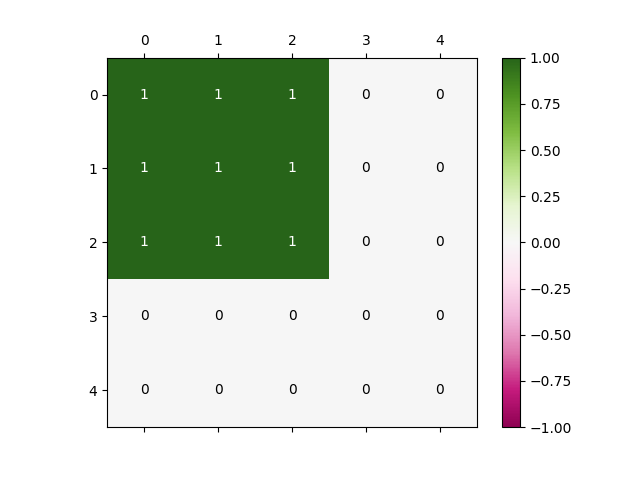

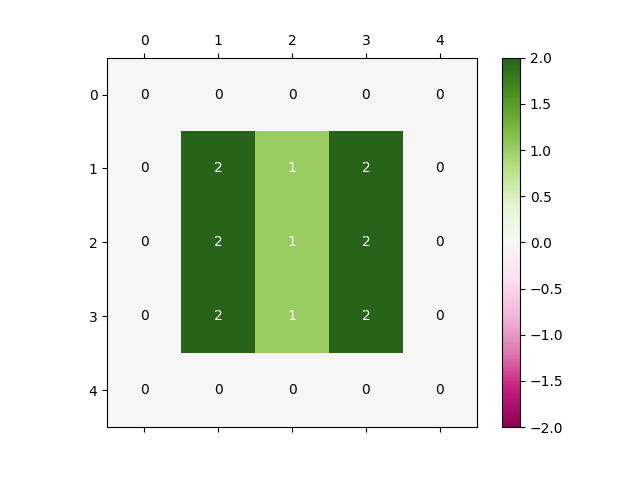

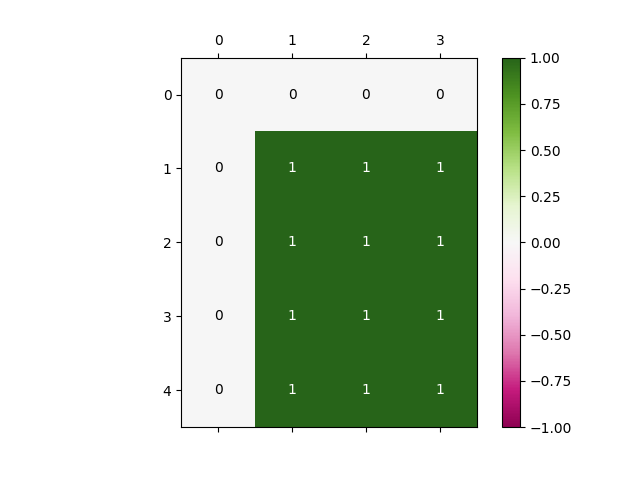

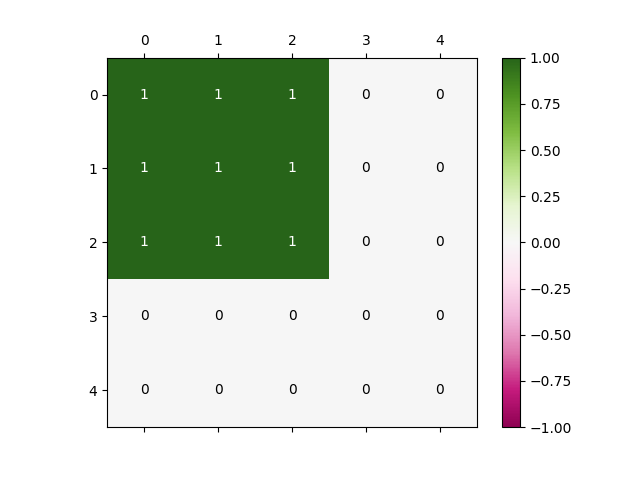

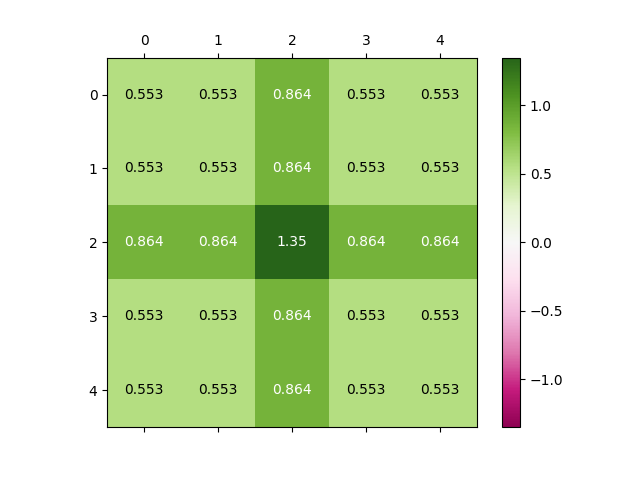

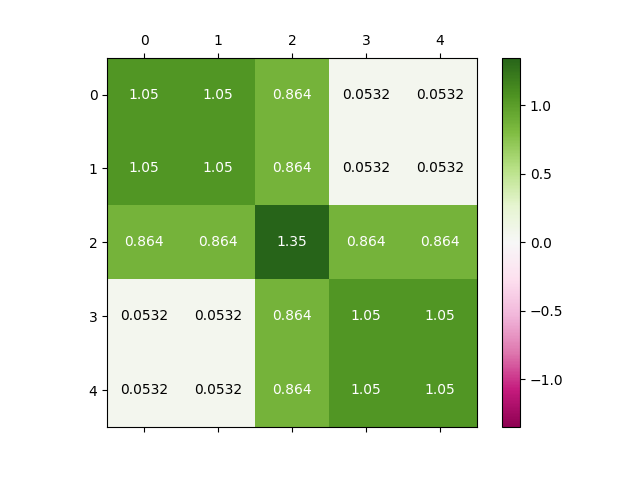

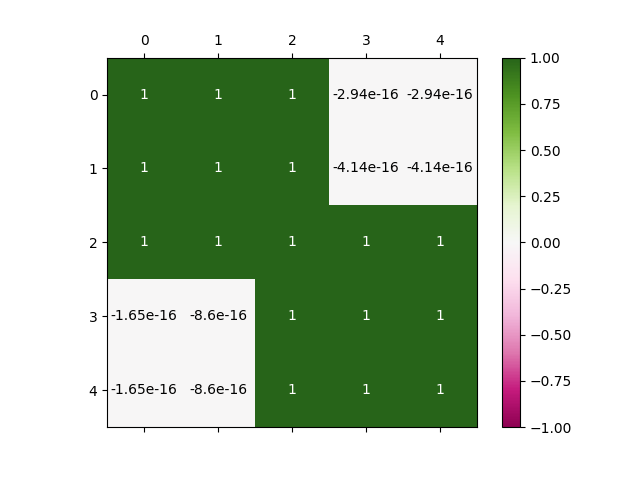

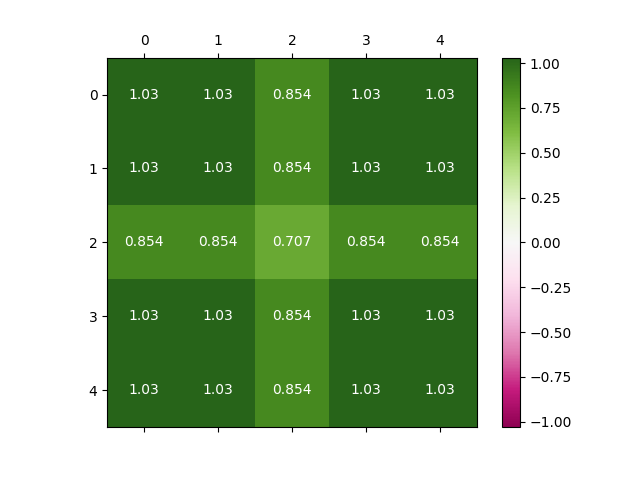

In [23]:
# You can use the functions svdcomp and plot_matrix from util.py
# YOUR PART
matrices = [M1, M2, M3, M4, M5, M5, M5, M6]
ranks = [1, 1, 1, 1, 1, 2, 3, 1]

for matrix, rank in zip(matrices, ranks):
    result = svdcomp(matrix, range(rank))
    plot_matrix(result)


## 1d

In [ ]:
# Another method to compute the rank is matrix_rank.
# YOUR PART
print(matrix_rank(M6)) 
print(svd(M6)[1])

2
[4.82842712e+00 8.28427125e-01 9.95090019e-17 2.18529703e-17
 5.31822283e-50]


# 2 The SVD on Weather Data

In [27]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

/Users/anhnhat/Library/Mobile Documents/com~apple~CloudDocs/Documents/UNIMA/2. Semester Study/2. WS2425/1. W24 Machine Learning/Assignment/a03-svd/util.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # this creates a new plot


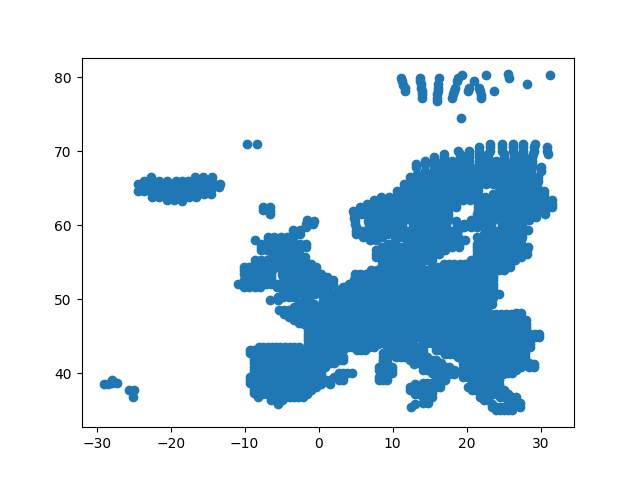

In [28]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [30]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.
X = (climate - climate.mean()) / climate.std()

/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_32776/2722728386.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=plt.gca())


array([[<Axes: title={'center': 'min1'}>,
        <Axes: title={'center': 'min2'}>,
        <Axes: title={'center': 'min3'}>,
        <Axes: title={'center': 'min4'}>,
        <Axes: title={'center': 'min5'}>,
        <Axes: title={'center': 'min6'}>,
        <Axes: title={'center': 'min7'}>],
       [<Axes: title={'center': 'min8'}>,
        <Axes: title={'center': 'min9'}>,
        <Axes: title={'center': 'min10'}>,
        <Axes: title={'center': 'min11'}>,
        <Axes: title={'center': 'min12'}>,
        <Axes: title={'center': 'max1'}>,
        <Axes: title={'center': 'max2'}>],
       [<Axes: title={'center': 'max3'}>,
        <Axes: title={'center': 'max4'}>,
        <Axes: title={'center': 'max5'}>,
        <Axes: title={'center': 'max6'}>,
        <Axes: title={'center': 'max7'}>,
        <Axes: title={'center': 'max8'}>,
        <Axes: title={'center': 'max9'}>],
       [<Axes: title={'center': 'max10'}>,
        <Axes: title={'center': 'max11'}>,
        <Axes: title={'cen

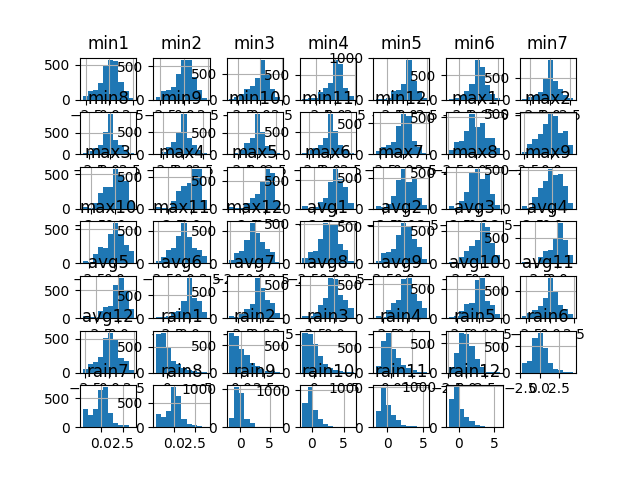

In [31]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [ ]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART
# Compute SVD efficiently
U, s, Vt = np.linalg.svd(X, full_matrices=False)

# Calculate rank directly from singular values
tol = s.max() * np.finfo(s.dtype).eps * max(X.shape)
rank_X = np.sum(s > tol)

print(f"Matrix rank: {rank_X}")


Matrix rank: 48


## 2c

### 1st left singular vector

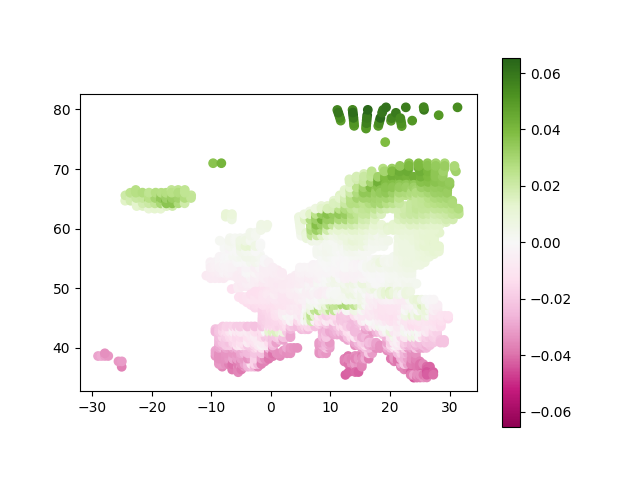

In [34]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

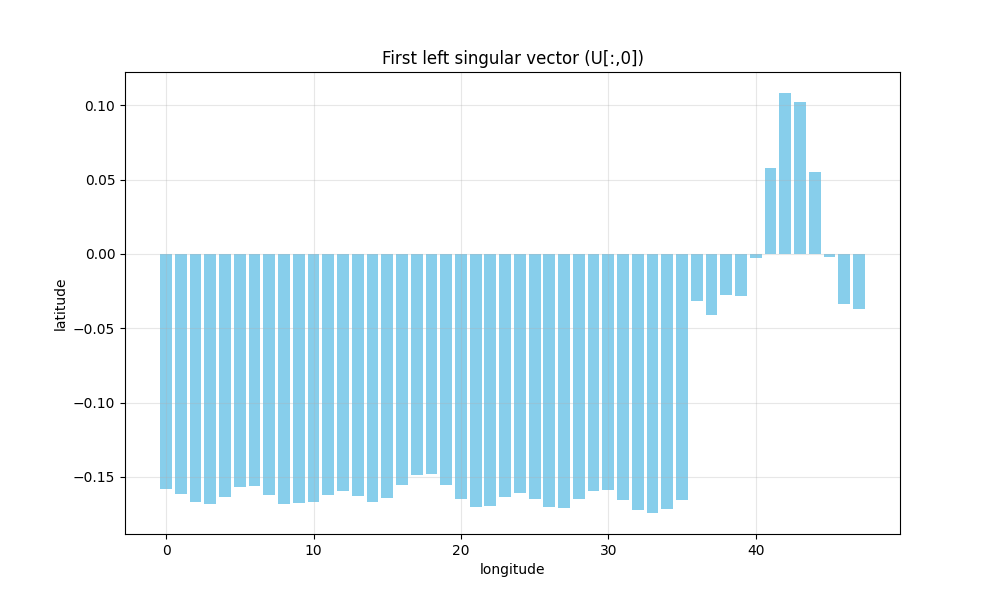

In [39]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(range(48), Vt[0,:], color='skyblue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('First left singular vector (U[:,0])')
plt.grid(True, alpha=0.3)
plt.show()


### 2nd left singular vector

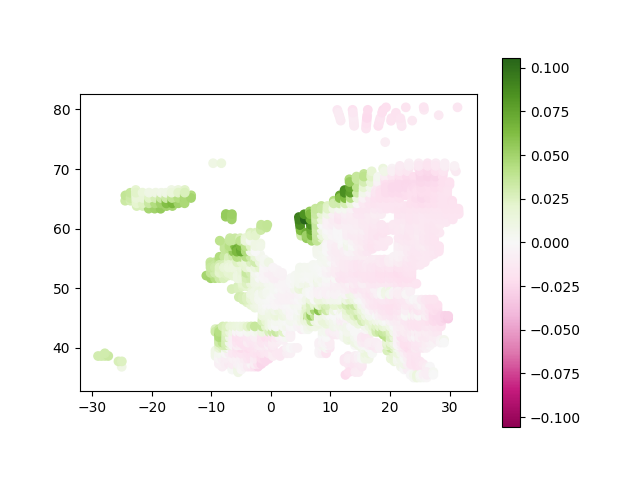

In [44]:
plot_xy(lon, lat, z=U[:,1])

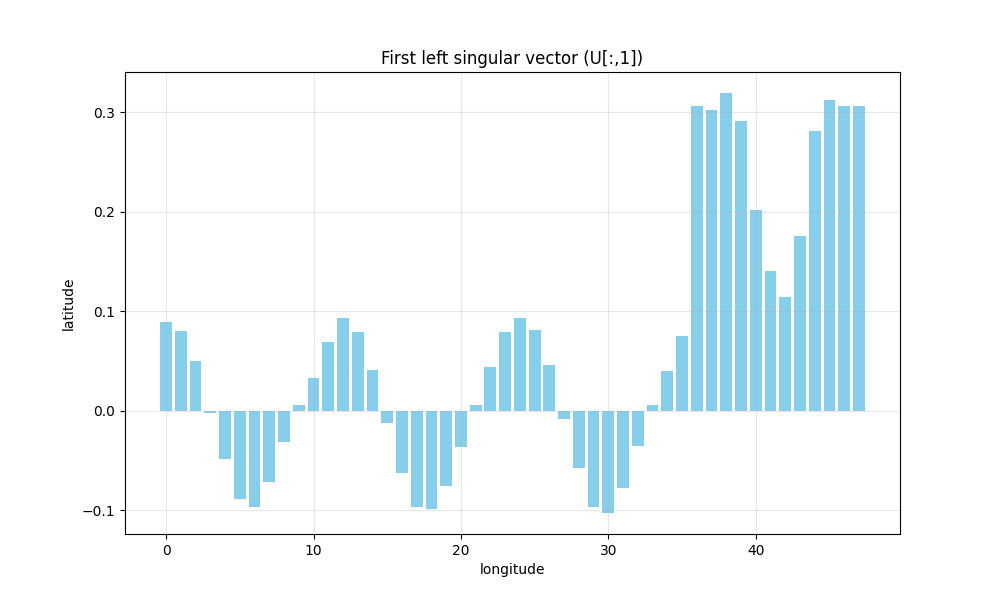

In [48]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(range(48), Vt[1,:], color='skyblue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('First left singular vector (U[:,1])')
plt.grid(True, alpha=0.3)
plt.show()


### 3nd left singular vector

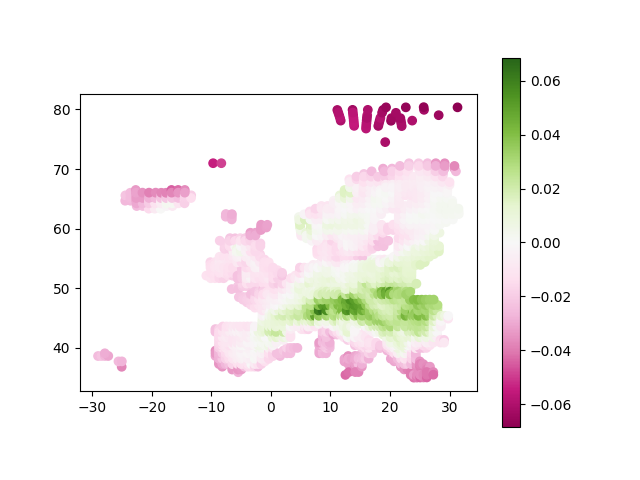

In [46]:
plot_xy(lon, lat, z=U[:,2])

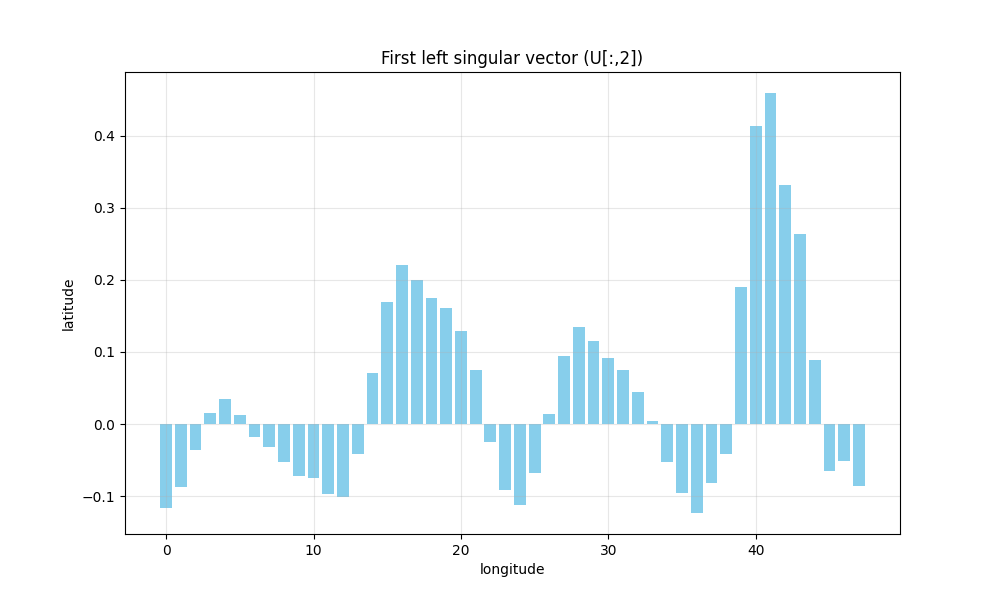

In [49]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(range(48), Vt[2,:], color='skyblue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('First left singular vector (U[:,2])')
plt.grid(True, alpha=0.3)
plt.show()


### 4nd left singular vector

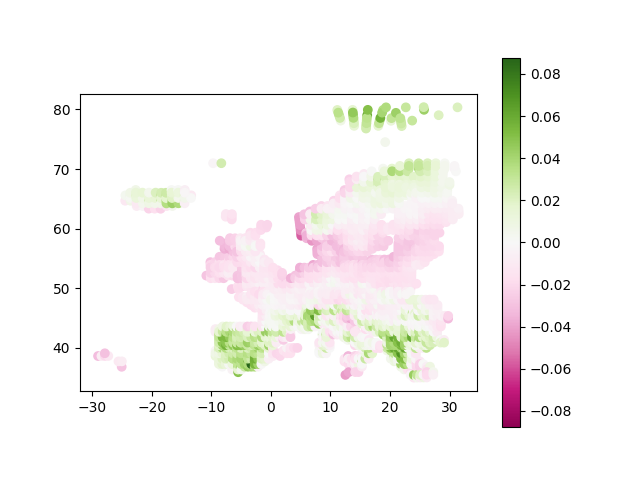

In [50]:
plot_xy(lon, lat, z=U[:,3])

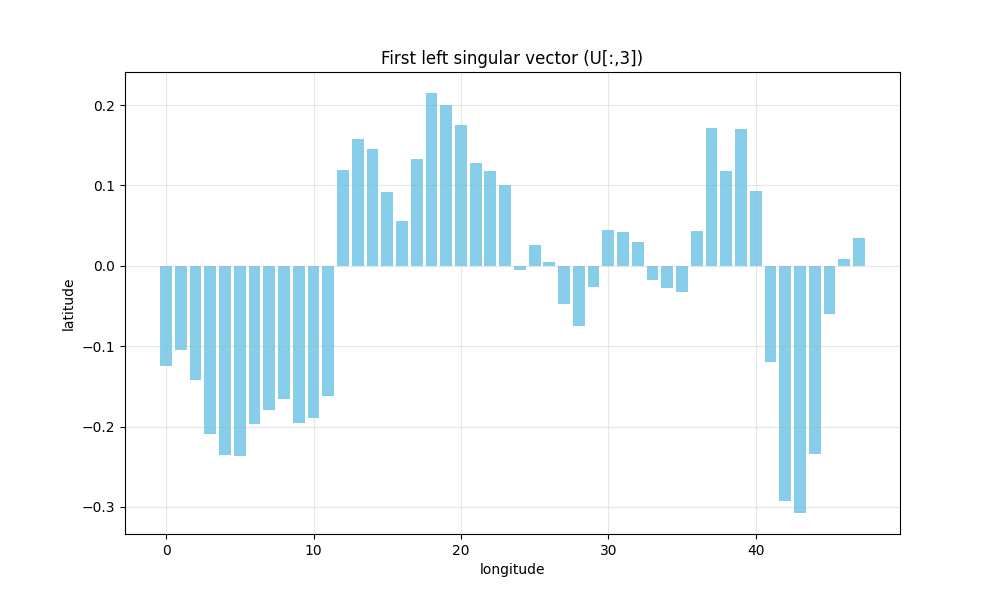

In [51]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(range(48), Vt[3,:], color='skyblue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('First left singular vector (U[:,3])')
plt.grid(True, alpha=0.3)
plt.show()


### 5nd left singular vector

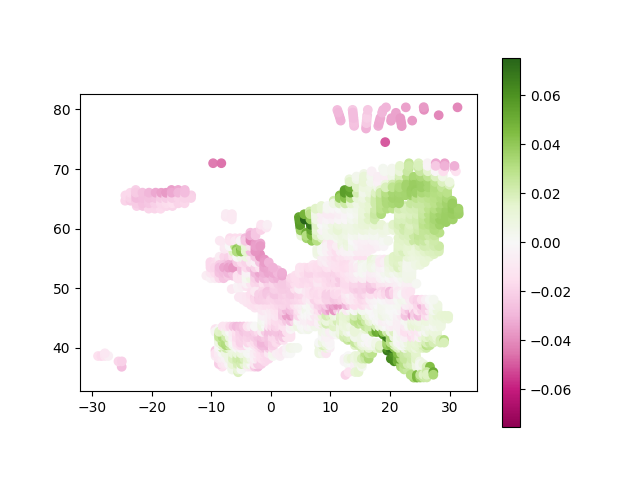

In [53]:
plot_xy(lon, lat, z=U[:,4])


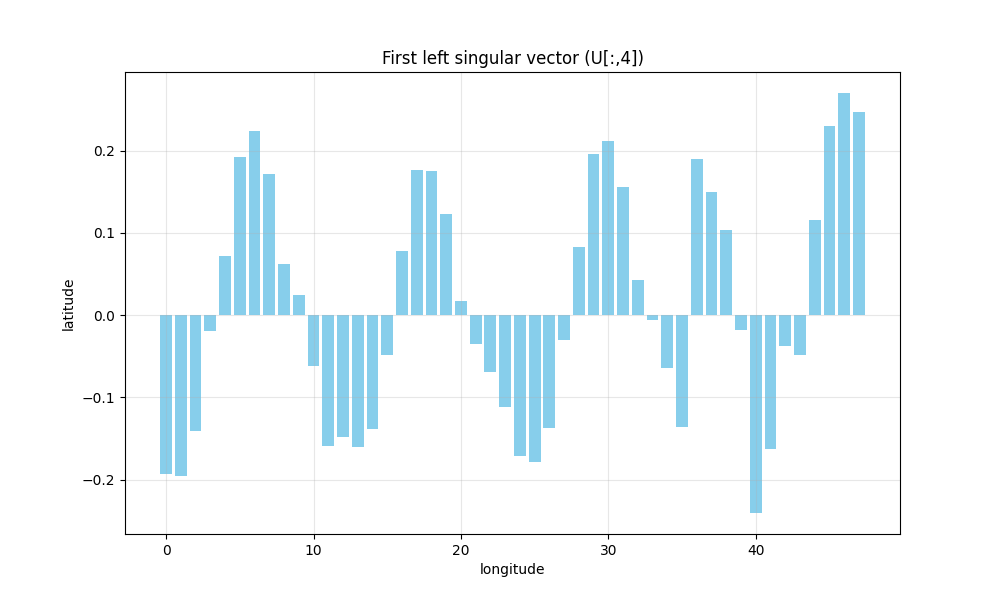

In [54]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(range(48), Vt[4,:], color='skyblue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('First left singular vector (U[:,4])')
plt.grid(True, alpha=0.3)
plt.show()


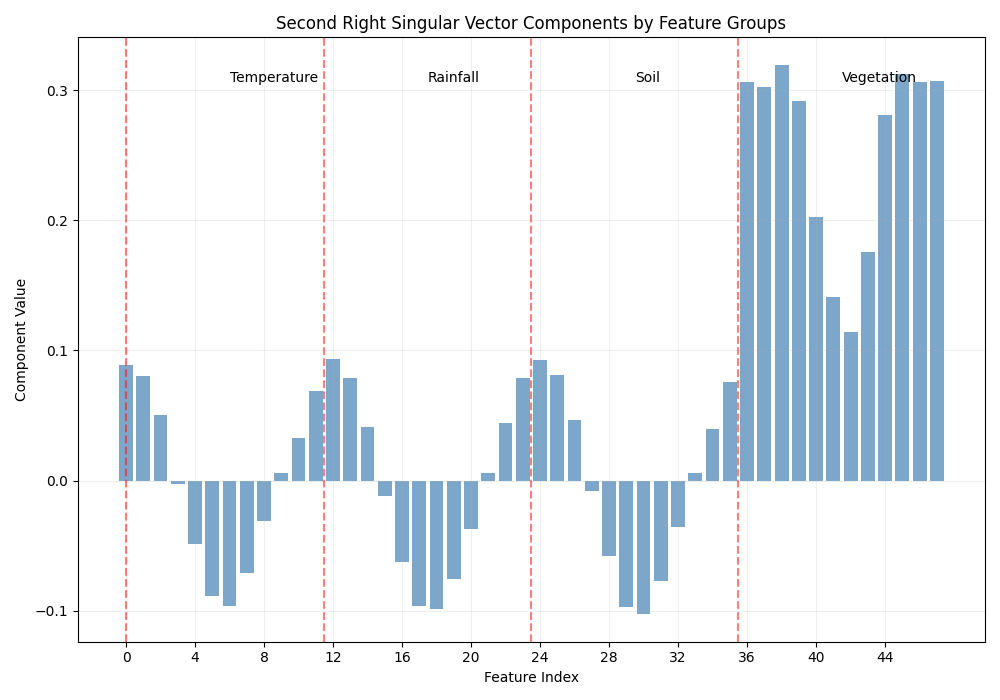

In [57]:
# Set figure size and style
plt.figure(figsize=(10, 7))

# Create bar plot
plt.bar(np.arange(48), Vt[1,:], color='steelblue', alpha=0.7)

# Add vertical lines to separate feature groups
feature_boundaries = [11.5, 23.5, 35.5]
labels = ['Temperature', 'Rainfall', 'Soil', 'Vegetation']
for x, label in zip([0] + feature_boundaries, labels):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)
    plt.text(x+6, plt.ylim()[1]*0.9, label, rotation=0)

# Customize plot
plt.title('Second Right Singular Vector Components by Feature Groups')
plt.xlabel('Feature Index')
plt.ylabel('Component Value')
plt.grid(True, alpha=0.2)
plt.xticks(np.arange(0, 48, 4))

# Add tight layout and show
plt.tight_layout()
plt.show()

            

## 2d

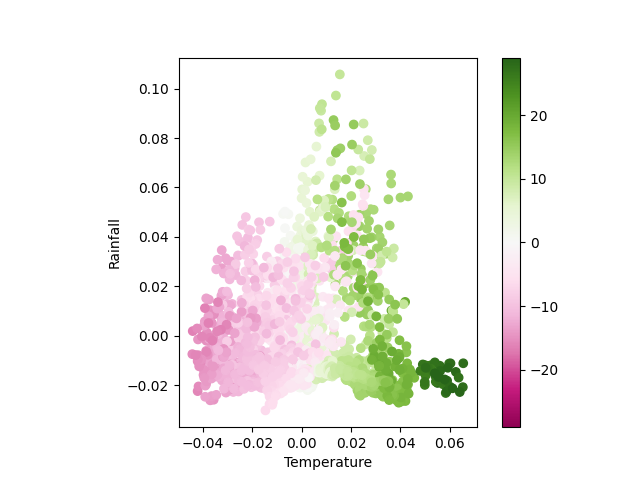

In [ ]:
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()

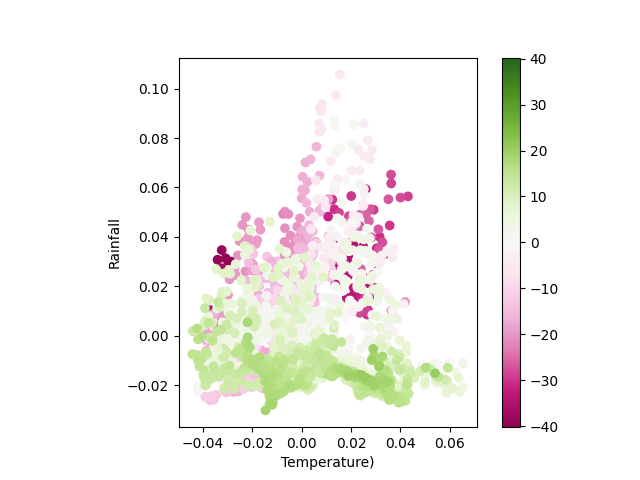

In [73]:
plot_xy(U[:, 0], U[:, 1], lon - np.mean(lon))
plt.xlabel('Temperature)')
plt.ylabel('Rainfall')
plt.show()

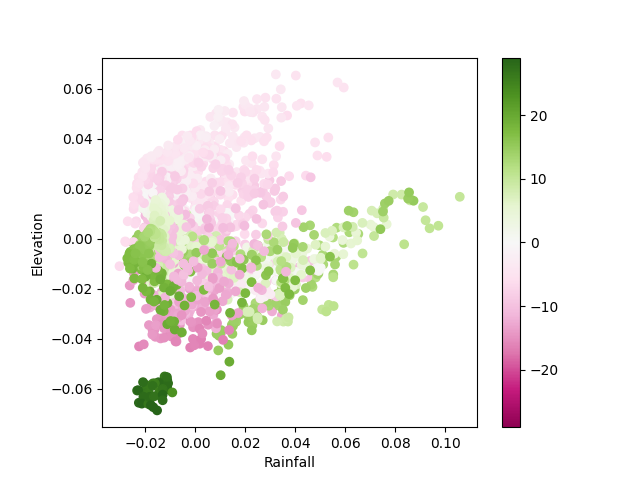

In [74]:
plot_xy(U[:, 1], U[:, 2], lat - np.mean(lat))
plt.xlabel('Rainfall')
plt.ylabel('Elevation')
plt.show()

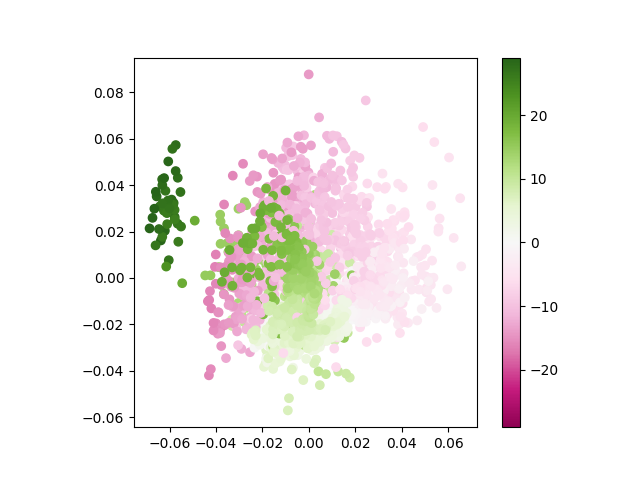

In [70]:
plot_xy(U[:, 2], U[:, 3], lat - np.mean(lat))

## 2e

In [75]:
# 2e(i) Guttman-Kaiser
# YOUR PART
# Perform SVD decomposition
X_svd = svd(X)  # Returns (U, S, Vt)

# Filter singular values < 1 to zero
# X_svd[1] contains singular values
singular_values = X_svd[1]
singular_values[singular_values < 1] = 0

# Count remaining non-zero singular values
k = np.count_nonzero(singular_values)  # k=37 indicates effective rank
print(f"Number of significant singular values: {k}")

Number of significant singular values: 37


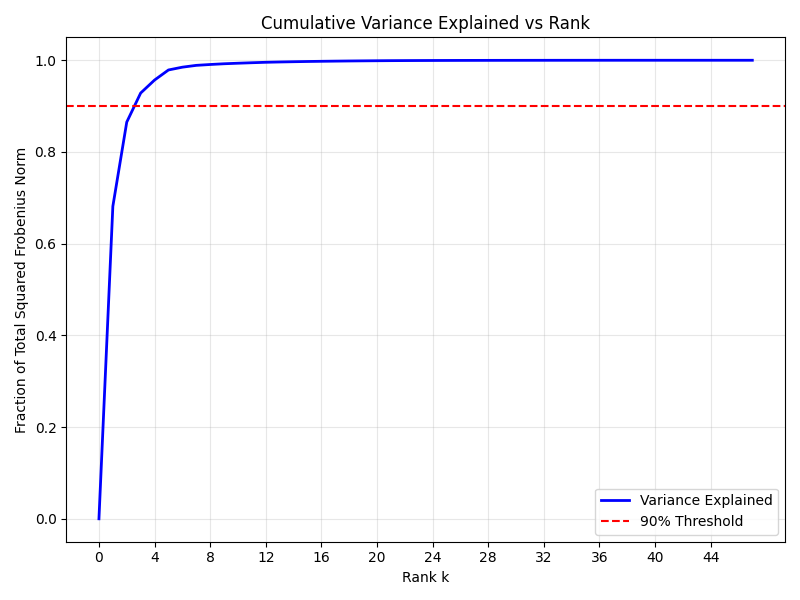

In [77]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

# Calculate Frobenius norm ratios
total_norm = np.linalg.norm(X, ord='fro')**2
results = [np.linalg.norm(svdcomp(X, range(k)), ord='fro')**2 / total_norm 
          for k in range(48)]

# Create enhanced visualization
plt.figure(figsize=(8, 6))
plt.plot(results, 'b-', linewidth=2, label='Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')

# Customize plot
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(0, 48, 4))
plt.xlabel('Rank k')
plt.ylabel('Fraction of Total Squared Frobenius Norm')
plt.title('Cumulative Variance Explained vs Rank')
plt.legend()

# Show plot with tight layout
plt.tight_layout()
plt.show()

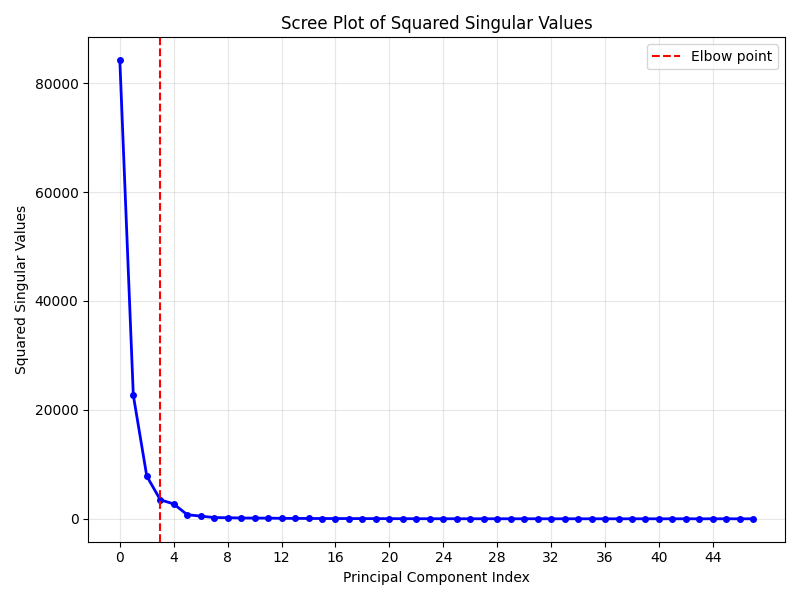

In [79]:
# 2e(iv) entropy
# YOUR PART
# Create scree plot
plt.figure(figsize=(8, 6))

# Plot squared singular values
plt.plot(np.arange(48), np.square(s), 'b-', linewidth=2, marker='o', markersize=4)

# Add vertical line at elbow point
plt.axvline(3, color='red', linestyle='--', label='Elbow point')

# Customize plot
plt.title('Scree Plot of Squared Singular Values')
plt.ylabel('Squared Singular Values')
plt.xlabel('Principal Component Index')
plt.xticks(np.arange(0, 48, 4))
plt.grid(True, alpha=0.3)
plt.legend()

# Add tight layout and show
plt.tight_layout()
plt.show()

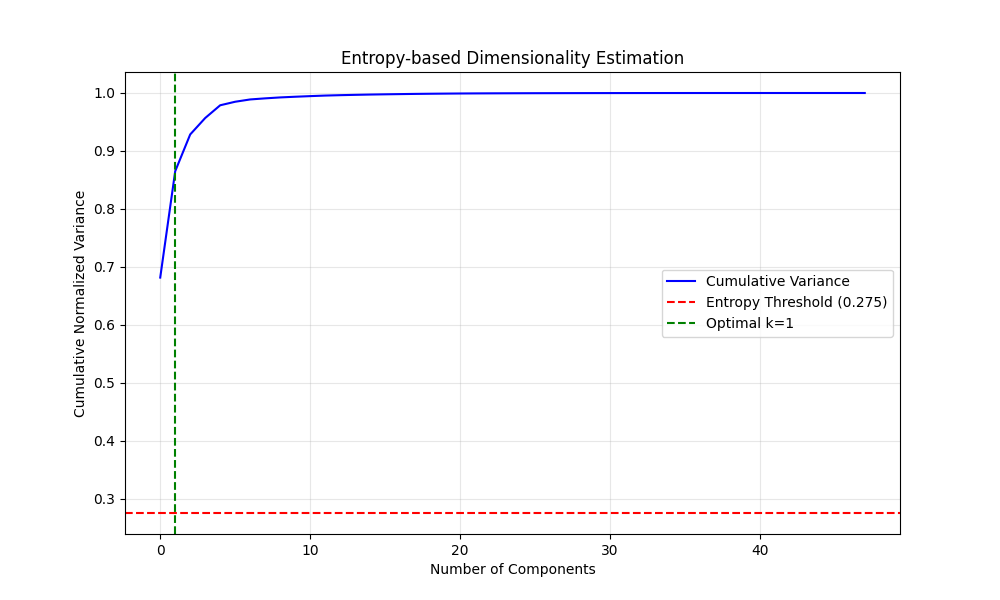

Optimal number of components (k): 1


In [80]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART
import numpy as np

# Calculate normalized squared singular values
fk = np.square(s) / np.sum(np.square(s))

# Calculate entropy threshold using Shannon entropy
E = -1/np.log(np.min(X.shape)) * np.sum(fk * np.log(fk))

# Find optimal k using cumulative sum comparison
k = 1
cumsum = 0
for fi in fk:
    if cumsum + fi < E:
        cumsum += fi
        k += 1
    else:
        break

# Optional: Visualize the result
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(fk), 'b-', label='Cumulative Variance')
plt.axhline(y=E, color='r', linestyle='--', label=f'Entropy Threshold ({E:.3f})')
plt.axvline(x=k, color='g', linestyle='--', label=f'Optimal k={k}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Normalized Variance')
plt.title('Entropy-based Dimensionality Estimation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal number of components (k): {k}")

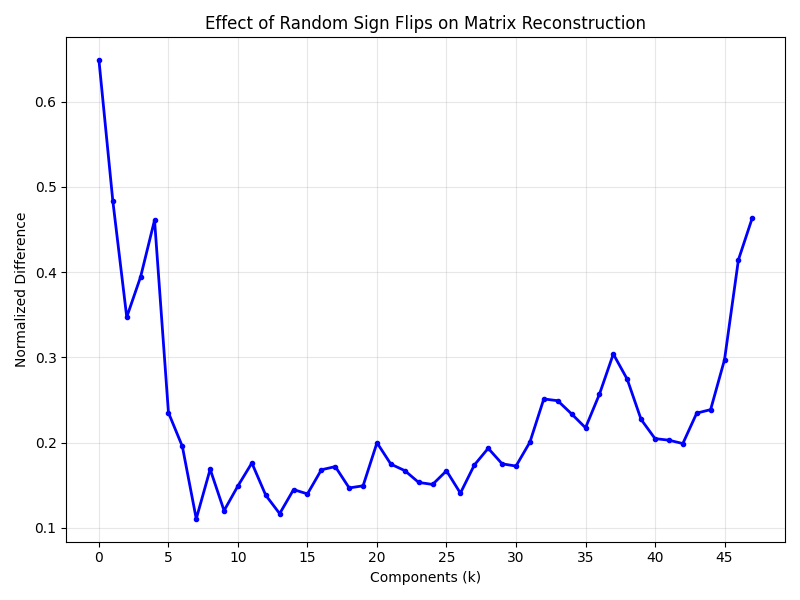

In [82]:

# Calculate random sign flips effect
flipped_matrix = np.random.choice([-1,1], X.shape)
results = []

for k in range(48):
    # Calculate residual matrix
    X_k = np.subtract(svdcomp(X), svdcomp(X, components=range(k)))
    # Apply random sign flips
    X_k_tilde = X_k * np.random.choice([-1,1], X.shape)
    # Compute normalized difference
    flip_effect = (np.linalg.norm(X_k, ord=2) - np.linalg.norm(X_k_tilde, ord=2)) / np.linalg.norm(X_k, ord='fro')
    results.append(flip_effect)

# Create enhanced visualization
plt.figure(figsize=(8, 6))
plt.plot(results, 'b-', linewidth=2, marker='o', markersize=3)
plt.grid(True, alpha=0.3)
plt.title('Effect of Random Sign Flips on Matrix Reconstruction')
plt.xlabel('Components (k)')
plt.ylabel('Normalized Difference')
plt.xticks(np.arange(0, 48, 5))
plt.tight_layout()
plt.show()

## 2f

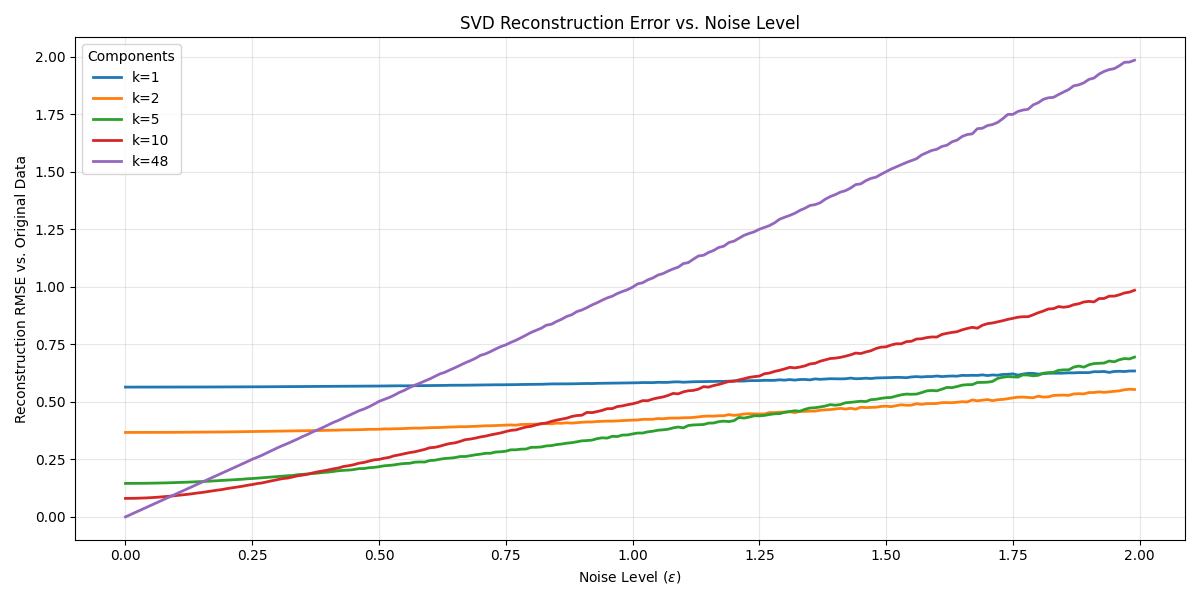

In [83]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART

# Define RMSE function
def rmse(A, A_hat):
    M, N = A.shape
    return (1/np.sqrt(M*N)) * np.linalg.norm(np.subtract(A, A_hat), ord='fro')

# Set up parameters
epsilon = np.arange(0, 2, 0.01)  # noise levels
K = [1, 2, 5, 10, 48]  # number of components to test

# Create figure
plt.figure(figsize=(12, 6))

# Calculate and plot RMSE for each k
for k in K:
    r_mse = []
    for e in epsilon:
        # Generate noisy data
        X_noisy = X + np.random.randn(*X.shape) * e
        # Calculate RMSE
        r_mse.append(rmse(X, svdcomp(X_noisy, components=range(k))))
    plt.plot(epsilon, r_mse, label=f'k={k}', linewidth=2)

# Customize plot
plt.grid(True, alpha=0.3)
plt.legend(title='Components')
plt.xlabel(r'Noise Level ($\epsilon$)')
plt.ylabel('Reconstruction RMSE vs. Original Data')
plt.title('SVD Reconstruction Error vs. Noise Level')
plt.tight_layout()
plt.show()

# 3 SVD and k-means

In [84]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

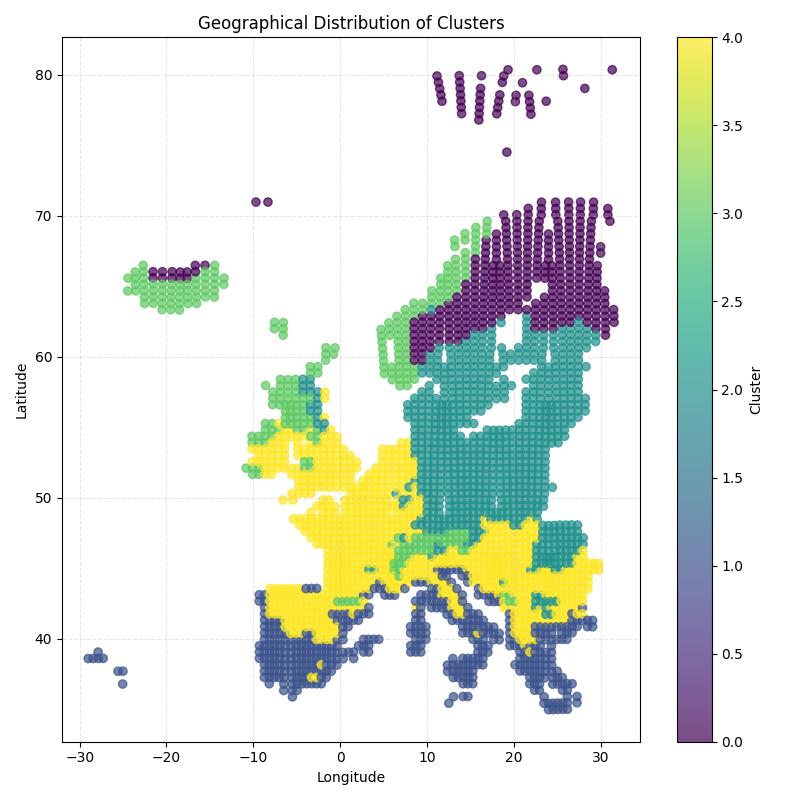

In [88]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plt.figure(figsize=(8, 8))

# Create geographical scatter plot
scatter = plt.scatter(lon, lat, 
                     c=X_clusters,
                     cmap='viridis',
                     alpha=0.7)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Clusters')

# Add colorbar for cluster identification
plt.colorbar(scatter, label='Cluster')

# Add grid and improve layout
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 3b

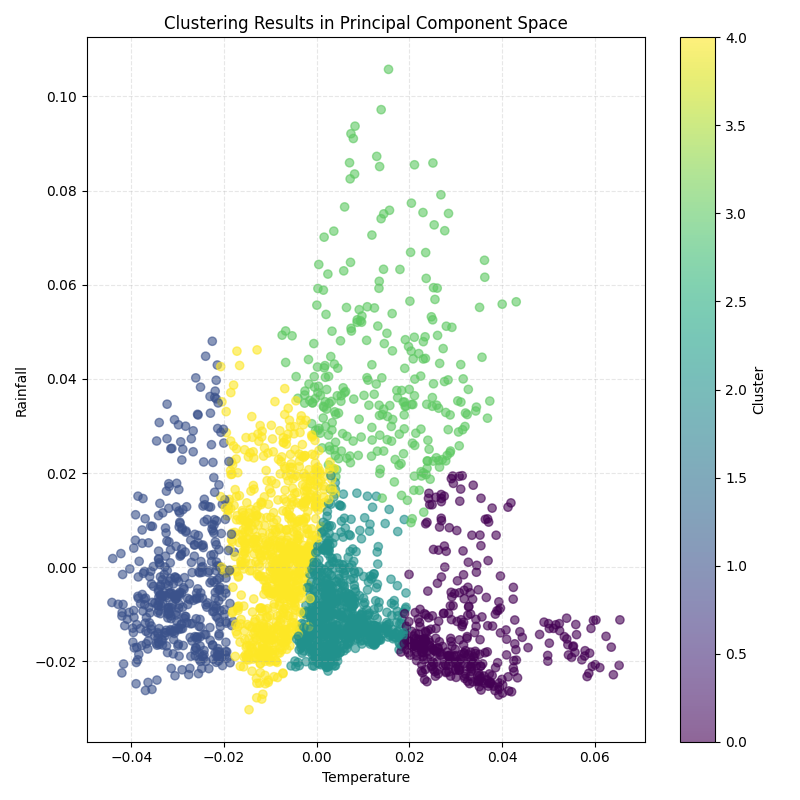

In [86]:
# YOUR PART HERE

plt.figure(figsize=(8, 8))

# Create scatter plot with cluster colors
scatter = plt.scatter(U[:,0], U[:,1], 
                     c=X_clusters,  # Color by cluster assignment
                     cmap='viridis',  # Use distinct colors for clusters
                     alpha=0.6)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering Results in Principal Component Space')

# Add legend showing clusters
plt.colorbar(scatter, label='Cluster')

# Improve readability
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 3c

In [95]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE
Z = [U[:, :k+1] @ np.diag(s[:k+1]) for k in range(3)]


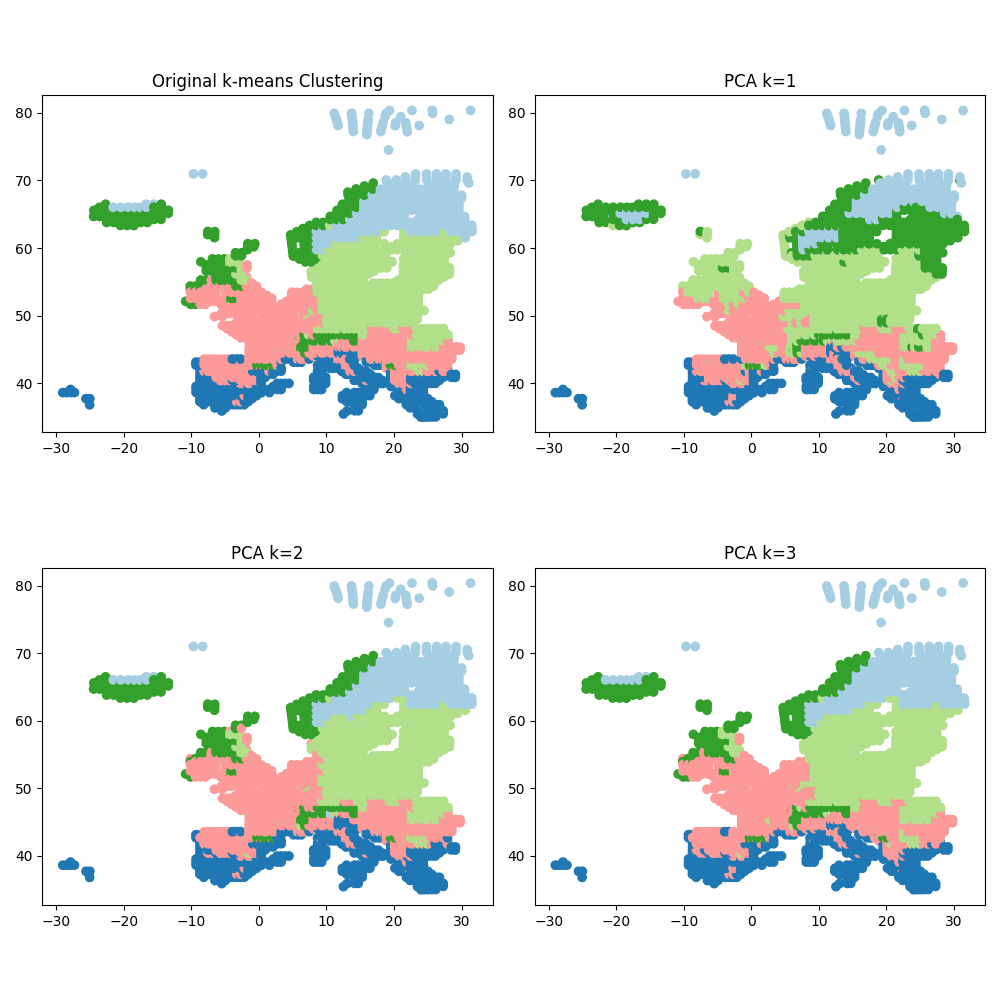

In [97]:
# cluster and visualize

# Perform clustering on PCA components
Z_clusters = [KMeans(n_clusters=5, random_state=42).fit(z).labels_ for z in Z]
# Match cluster labels
Z_clusters = [match_categories(X_clusters, z) for z in Z_clusters]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot original k-means clustering
plot_xy(lon, lat, X_clusters, axis=axs[0, 0])
axs[0, 0].set_title('Original k-means Clustering')

# Plot PCA-based clusters with increasing components
titles = ['PCA k=1', 'PCA k=2', 'PCA k=3']
positions = [(0, 1), (1, 0), (1, 1)]

for z_cluster, title, (i, j) in zip(Z_clusters, titles, positions):
    plot_xy(lon, lat, z_cluster, axis=axs[i, j])
    axs[i, j].set_title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()